### This is a test notebook for quickly testing the Cirq library and related tools

In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Creating a circuit."""

# Define three qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

# Define a list of operations.
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b, c), cirq.H(b)]

# Create a circuit from the list of operations.
circuit = cirq.Circuit(ops)
print("Circuit:\n")
print(circuit)

Circuit:

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


In [3]:
"""Get a circuit to simulate."""


def basic_circuit(measure=True):
    """Returns a simple circuit with some one- and two-qubit gates,
    as well as (optionally) measurements.
    """
    # Gates we will use in the circuit.
    sqrt_x = cirq.X**0.5
    cz = cirq.CZ

    # Yield the operations.
    yield sqrt_x(a), sqrt_x(b)
    yield cz(a, b)
    yield sqrt_x(a), sqrt_x(b)
    if measure:
        yield cirq.measure(a, b)


# Create a circuit including measurements.
circuit = cirq.Circuit(basic_circuit())
print(circuit)

a: ───X^0.5───@───X^0.5───M───
              │           │
b: ───X^0.5───@───X^0.5───M───


In [4]:
"""Example of simulating a circuit in Cirq."""

# Get a simulator.
simulator = cirq.Simulator()

# Pass the circuit to the simulator.run method.
result = simulator.run(circuit, repetitions=1)
print("Measurement results:")
print(result)

Measurement results:
a,b=0, 1


In [5]:
"""Simulating a circuit with the `simulate` method."""

# Get a circuit without measurements.
circuit = cirq.Circuit(basic_circuit(measure=False))

# Simulate the circuit.
result = simulator.simulate(circuit, qubit_order=[a, b])

# Print the final state vector (wavefunction).
print("State vector:")
print(np.around(result.final_state_vector, 3))

# Print the state vector in Dirac notation.
print("\nDirac notation:")
print(result.dirac_notation())

State vector:
[0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]

Dirac notation:
0.5|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + 0.5|11⟩


Counter({2: 278, 1: 248, 0: 239, 3: 235})


c:\Users\onni\AppData\Local\pypoetry\Cache\virtualenvs\poetry-project-zZbqvrMu-py3.10\lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

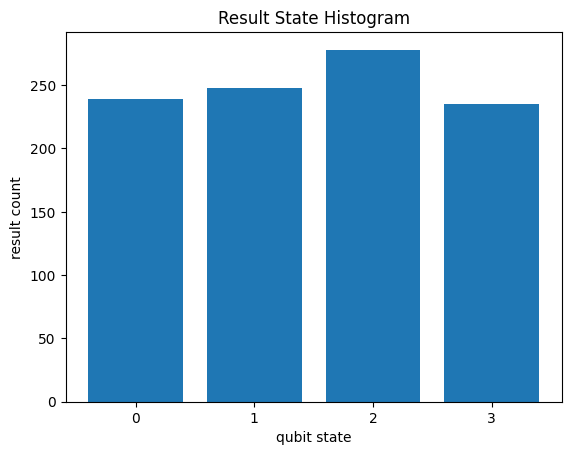

In [6]:
"""Simulate a circuit using 1000 repetitions."""

# Get a circuit with terminal measurements to simulate.
circuit = cirq.Circuit(basic_circuit())

# Sample from the circuit 1000 times.
result = simulator.run(circuit, repetitions=1000)

# Get a histogram of measurement results.
print(result.histogram(key="a,b"))

# Plot a state histogram of the result.
cirq.plot_state_histogram(result)

In [ ]:
# Device that has a grid of qubits and only allows H, CZ and measurement operations

class SquareDevice(cirq.Device):
    """A Square Grid Device.

    The device that only allows
        1) Grid Qubits from (0, 0) to (grid_size - 1, grid_size - 1)
        2) H, CZ and MeasurementGate gates.
    """

    def __init__(self, grid_size):
        self.qubits = []
        for i in range(grid_size):
            for j in range(grid_size):
                self.qubits.append(cirq.GridQubit(i, j))

    def validate_operation(self, operation: 'cirq.Operation') -> None:
        if not isinstance(operation, cirq.GateOperation):
            raise ValueError(f"Unsupported operation {operation}")
        if not (
            operation.gate in [cirq.H, cirq.CZ] or isinstance(operation.gate, cirq.MeasurementGate)
        ):
            raise ValueError(f"Unsupported gate {operation.gate}")
        for qubit in operation.qubits:
            if qubit not in self.qubits:
                raise ValueError(f"Qubit {qubit} not on device")



<method-wrapper '__str__' of SquareDevice object at 0x0000026C280FD540>
